El HDBSCAN es una variante jerárquica del original DBSCAN en la que no se necesita determinar el radio. Se hace un barrido sobre varios valores de $R$ y se elige el que mejor estabilidad tiene. 

Dado un entero $m$, la distancia nuclear $d_c^{(m)}$ para un punto $x_i$ se define como la distancia de $x_i$ a su $m$-ésimo vecino cercando.

La distancia de alcance mutua se define como 

$$d_m(x_i,x_j)=\max \left(d_c^{(m)}(x_i), d_c^{(m)}(x_j), d(x_i,x_j)\right)  $$

donde $d(x_i,x_j)$ es la distancia original de $x_i$ a $x_j$. Esta nueva distancia se usa para crear un grafo $G$ donde los vértices son los datos y las aristas tienen el peso dado por la distancia $d_m$. Del grafo $G$ se obtiene su [Minimum Spanning Tree](https://en.wikipedia.org/wiki/Minimum_spanning_tree) (MST). El MST forma el cluster global inicial. Luego se van quitando una a una las aristas más pequeñas del MST y así se irán formando los clusters. Al final se tendrá el caso donde cada punto es su propio cluster. De todo este proceso se toman los cluster que *sobrevivieron* más tiempo y se reportan al final del proceso.

Esto hace que HDBSCAN dependa sólo del parámetro $m$ que es más fácil de estimar. La implementación que veremos usa `min_cluster_size` como el parámetro $m$.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import HDBSCAN
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons, make_circles, make_classification, make_s_curve

In [2]:
color = np.array(["r", "b", "y", "g", "k", "c", "orange", "tomato", "gray", "m"])

Primero veamos cómo se comporta HDBSCAN variando `min_cluster_size`.

**(A lo largo de este notebook, el color magenta indica los puntos marcados como ruido)**

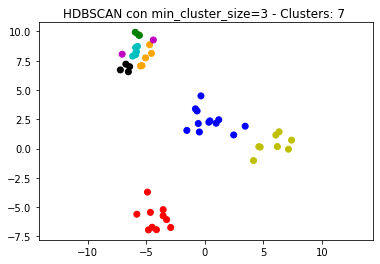

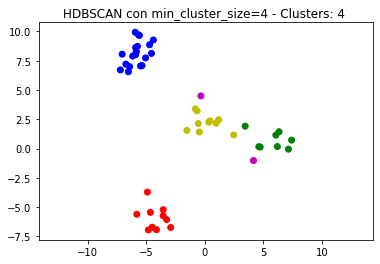

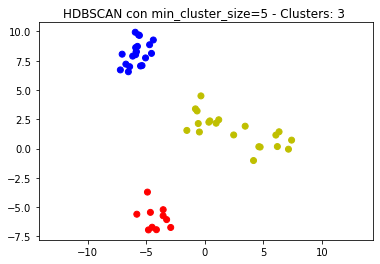

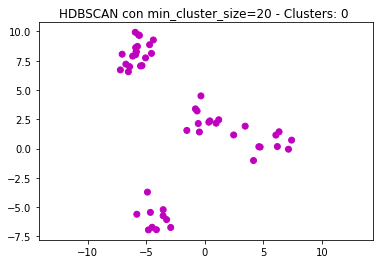

In [22]:
X, y = make_blobs(n_samples=50, centers=5, random_state=5)
mcs = [3,4,5,20]
for s in mcs:
    db = HDBSCAN(min_cluster_size=s)
    db.fit(X)
    y_c = db.labels_
    num_clusters = len(set(np.unique(y_c))-set([-1]))
    plt.scatter(X[:, 0], X[:, 1], c=color[y_c])
    plt.axis('equal')
    plt.title(f'HDBSCAN con min_cluster_size={s} - Clusters: {num_clusters} ')
    plt.show()

Ahora veremos algunos ejemplos sencillos donde se muestran particiones usando HDBSCAN. Primero veamos cuando los cluster están bien separados y con una forma convexa. 

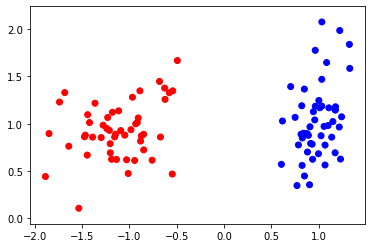

In [23]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
y_c = HDBSCAN(min_cluster_size=5).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=color[y_c])
plt.axis('equal')
plt.show()

Este es un ejemplo de dos clusters que no se pueden separa con k-means. Las formas de luna se aprecian claramente.

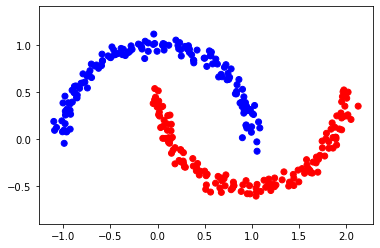

In [30]:
X, y = make_moons(n_samples=300, noise=0.05, random_state=0)
y_c = HDBSCAN(min_cluster_size=5).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=color[y_c])
plt.axis('equal')
plt.show()

Este es otro ejemplo de lunas pero más juntas. Note que sale unos puntos marcados como ruido.

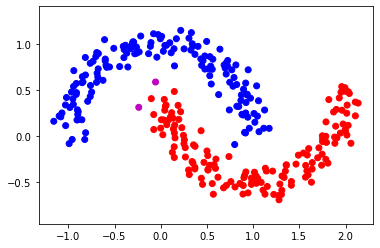

In [31]:
X, y = make_moons(n_samples=300, noise=0.1, random_state=1)
y_c = HDBSCAN(min_cluster_size=5).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=color[y_c])
plt.axis('equal')
plt.show()

Ahora vemos un ejemplo donde los cluster tienen diferentes densidades.

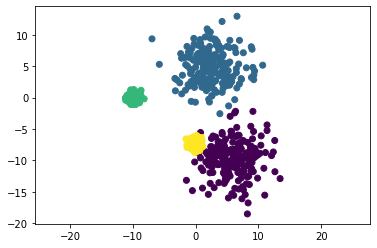

In [53]:
X, y = make_blobs(400, 2, centers=2, cluster_std=3, random_state=10)
X2, y2 = make_blobs(400, 2, centers=2, cluster_std=.5, random_state=9)
X = np.concatenate([X,X2])
y = np.concatenate([y,y2+2])
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.axis('equal')
plt.show()

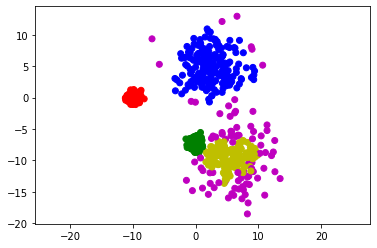

In [58]:
y_c = HDBSCAN(min_cluster_size=5).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=color[y_c])
plt.axis('equal')
plt.show()